In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#UFO Sightings
df = pd.read_csv('https://raw.githubusercontent.com/dymarczykm1/dymarczykm1/main/Data/ufo_location_shape_cleaned.csv')

#Setting seaborn style
sns.set(style='white', palette='bright')

#Removing column truncation and 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

blank_space_columns = ['Shape', 'Location', 'State', 'Country', 'Source']

for column in blank_space_columns:
    df[column] = df[column].str.replace(' ', '')

In [3]:
#Sightings in the USA
usa_sightings = df["USA"].sum()

#Print results
print(f"Total Sightings in the USA are {usa_sightings:,}")

Total Sightings in the USA are 3,437


In [4]:
#Sightings reported outside the US
total_sightings = df["USA"].count()
international_sightings = total_sightings- usa_sightings

#Print results
print(f"Total Sightings Internationally are {international_sightings:,}")

Total Sightings Internationally are 209


In [5]:
#New England since I am from CT
ct_sightings = df[df['State'] == "CT"]
me_sightings = df[df['State'] == "ME"]
ma_sightings = df[df['State'] == "MA"]
nh_sightings = df[df['State'] == "NH"]
vt_sightings = df[df['State'] == "VT"]
ri_sightings = df[df['State'] == "RI"]

#Combining dataframes
states = [ct_sightings, me_sightings, ma_sightings, nh_sightings, vt_sightings, ri_sightings]
new_england = pd.concat(states)

#New York - interesting to look at 
ny_sightings = df[df['State'] == "NY"]

#Pennsylvania - big state near me 
pa_sightings = df[df['State'] == "PA"]

#Combining dataframes
ny_pa = pa_sightings.append(ny_sightings)

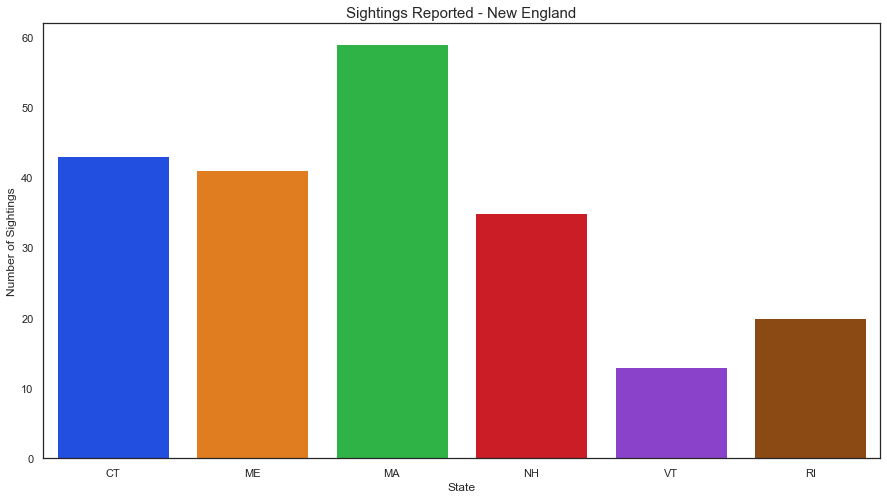

In [6]:
#Sightings in New England. UFOs seem to enjoy hanging around Massachusetts
plt.figure(figsize = (15,8))
ax = sns.countplot(data=new_england, x='State')
ax.set_title("Sightings Reported - New England", fontsize=15)
ax.set_ylabel("Number of Sightings");

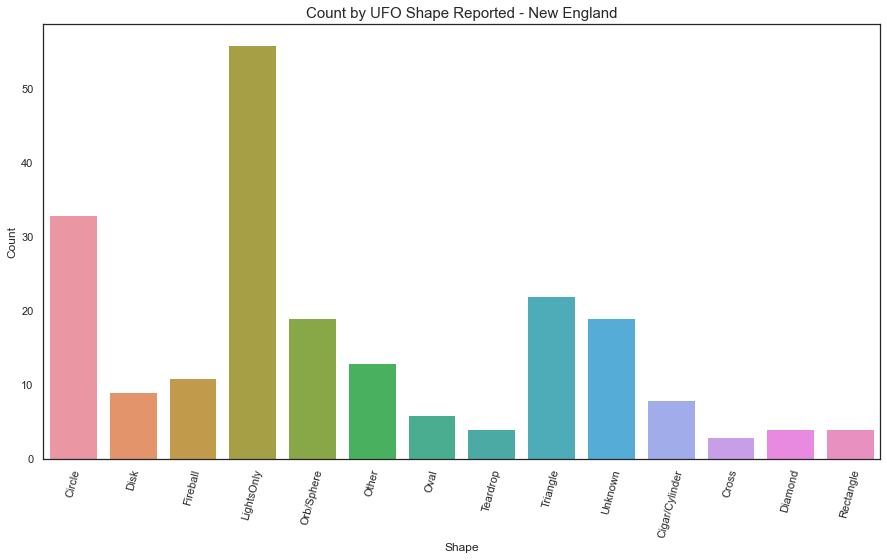

In [7]:
#If you see a UFO in New england its probably going to just be lights or a circle.
plt.figure(figsize = (15,8))
ax = sns.countplot(data=new_england, x='Shape')
ax.set_ylabel("Count")
ax.set_title("Count by UFO Shape Reported - New England", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75);

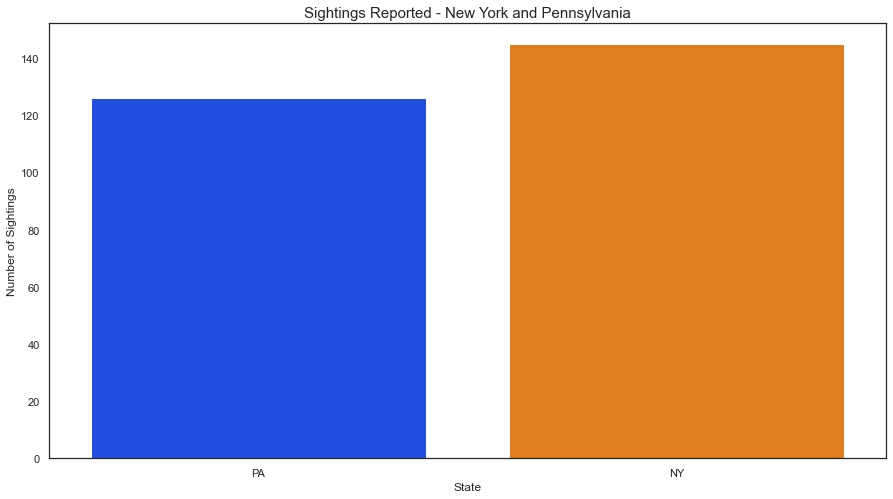

In [114]:
#New York wins in the showdown. The Knicks colors are a nice touch too.
plt.figure(figsize = (15,8))
ax = sns.countplot(data=ny_pa, x='State')
ax.set_title("Sightings Reported - New York and Pennsylvania", fontsize=15)
ax.set_ylabel("Number of Sightings");

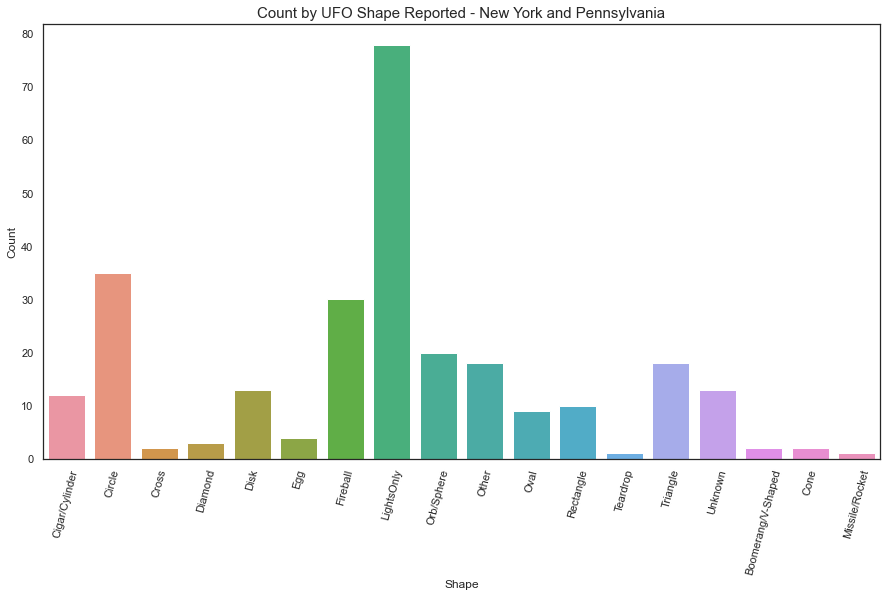

In [116]:
#Pretty much the same as New England but fireball?
plt.figure(figsize = (15,8))
ax = sns.countplot(data=ny_pa, x='Shape')
ax.set_ylabel("Count")
ax.set_title("Count by UFO Shape Reported - New York and Pennsylvania", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75);

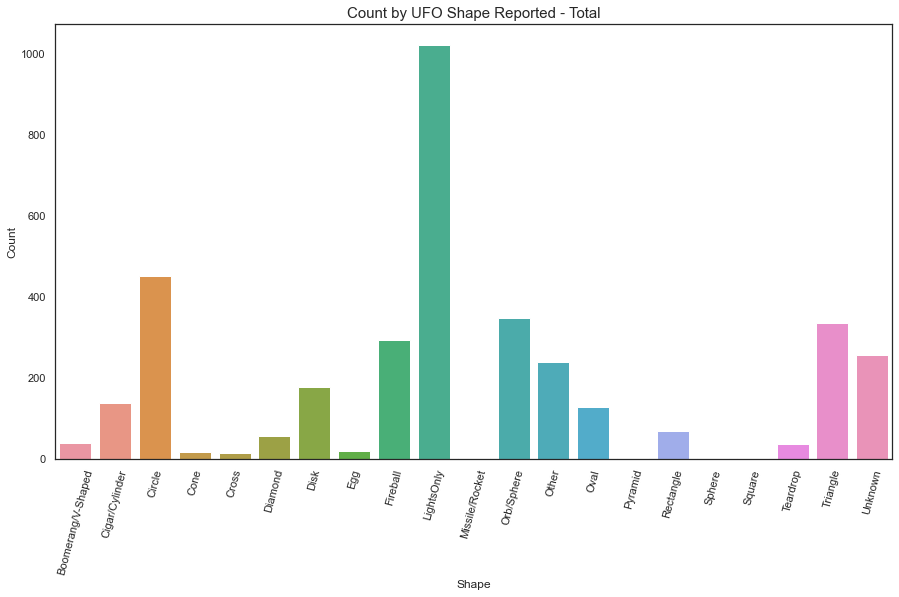

In [8]:
#Seems to coincide with what everyone else in the world sees too
plt.figure(figsize = (15,8))
ax = sns.countplot(data=df, x='Shape')
ax.set_ylabel("Count")
ax.set_title("Count by UFO Shape Reported - Total", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75);

In [10]:
#Investigating the Bible Belt. States where people report religion being 'very important' per Wikipedia
al_sightings = df[df['State'] == "AL"]
ms_sightings = df[df['State'] == "MS"]
la_sightings = df[df['State'] == "LA"]
tn_sightings = df[df['State'] == "TN"]
ar_sightings = df[df['State'] == "AR"]
sc_sightings = df[df['State'] == "SC"]

#Combining dataframes
bible = [al_sightings, ms_sightings, la_sightings, tn_sightings, ar_sightings, sc_sightings]
bible_belt = pd.concat(bible)


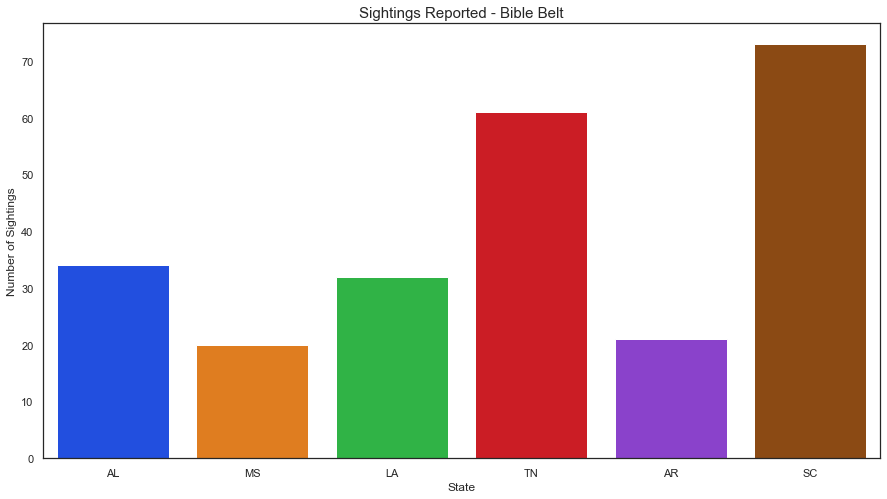

In [11]:
#High amount of sightings reported in South Carolina and Tennesse but nothing worth noting
plt.figure(figsize = (15,8))
ax = sns.countplot(data=bible_belt, x='State')
ax.set_title("Sightings Reported - Bible Belt", fontsize=15)
ax.set_ylabel("Number of Sightings");

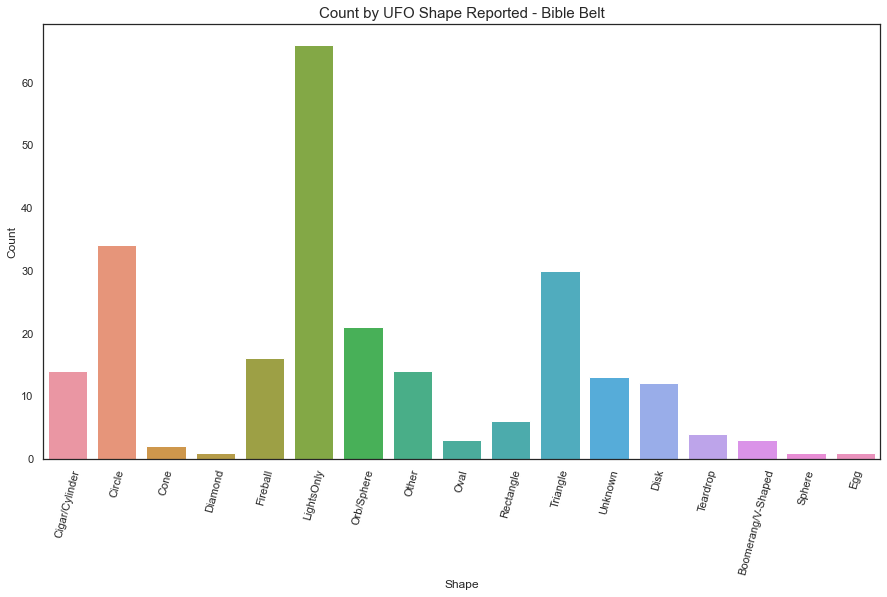

In [12]:
#Same story of seeing lights
plt.figure(figsize = (15,8))
ax = sns.countplot(data=bible_belt, x='Shape')
ax.set_ylabel("Count")
ax.set_title("Count by UFO Shape Reported - Bible Belt", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75);

In [97]:
#Let's see what states reported the most sightings and what date had the most sightings
by_state = df.groupby(by='State').count().reset_index()
result = by_state.sort_values(by='Location', ascending=False)

#And what year they were most common
by_event_date = df.groupby(by='Event Date').count().reset_index()
event_date = by_event_date.sort_values(by='Location', ascending=False)

#Lets cut the dataframe given how many dates there are.
event_date_cutoff = event_date[0:20]


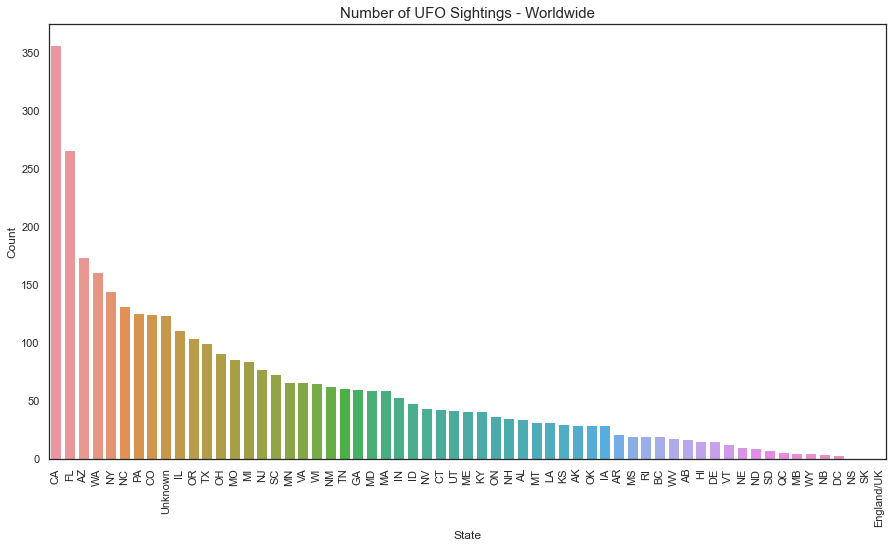

In [98]:
#California and Florida are heavy for sightings
plt.figure(figsize = (15,8))
ax = sns.barplot(data=result, x='State', y='USA')
ax.set_ylabel("Count")
ax.set_title("Number of UFO Sightings - Worldwide", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

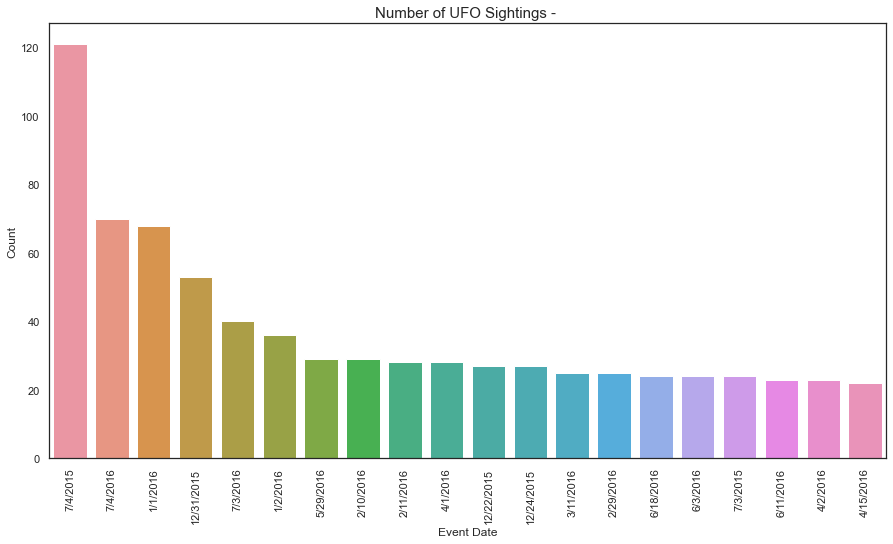

In [99]:
#July 4th 2015 was a day heavy for sightings!
plt.figure(figsize = (15,8))
ax = sns.barplot(data=event_date_cutoff, x='Event Date', y='USA')
ax.set_ylabel("Count")
ax.set_title("Number of UFO Sightings - ", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [100]:
event_date['Year'] = pd.DatetimeIndex(event_date['Event Date']).year

In [111]:
 event_date.sort_values(by='Year', ascending=False)

,Event Date,Shape,Location,State,Country,Source,USA,Year
10,1/12/2016,11,11,11,11,11,11,2016
412,6/28/2016,11,11,11,11,11,11,2016
182,2/15/2016,10,10,10,10,10,10,2016
304,4/6/2016,10,10,10,10,10,10,2016
306,4/8/2016,10,10,10,10,10,10,2016
42,1/27/2016,10,10,10,10,10,10,2016
189,2/2/2016,10,10,10,10,10,10,2016
327,5/17/2016,10,10,10,10,10,10,2016
38,1/25/2016,10,10,10,10,10,10,2016
340,5/24/2016,10,10,10,10,10,10,2016


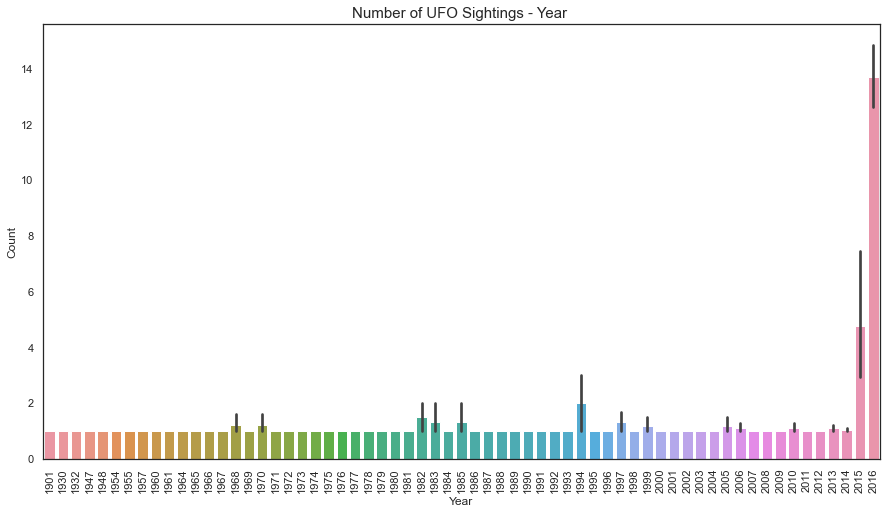

In [113]:
#Wow 2016 is a clear winner
plt.figure(figsize = (15,8))
ax = sns.barplot(data=event_date, x='Year', y='USA')
ax.set_ylabel("Count")
ax.set_title("Number of UFO Sightings - Year ", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);